# 🏥 PCOS Detection Using Machine Learning  

## 📌 Introduction  

Polycystic Ovary Syndrome (PCOS) is one of the most common endocrine disorders affecting women of reproductive age. It is characterized by hormonal imbalances, irregular menstrual cycles, and ovarian cysts, which can lead to complications such as infertility, insulin resistance, and metabolic disorders.  

🩺 Early detection and accurate diagnosis of PCOS are crucial for effective management and treatment. In this project, we leverage machine learning 🤖 techniques to analyze a dataset of 1,000 patients, using various classification models to predict PCOS diagnosis based on key health indicators.  

## 📊 About Dataset  

This dataset contains information related to patients with Polycystic Ovary Syndrome (PCOS), a common hormonal disorder affecting women of reproductive age. The dataset consists of 1,000 entries, each representing a patient, and includes five key features that are typically associated with the diagnosis and risk factors of PCOS. These features provide valuable insights into patients' health and can be used for exploratory data analysis (EDA), feature engineering, and machine learning model development for predicting PCOS diagnoses.  

### 🔍 Features:  
- Age (years): The age of the patient, ranging from 18 to 45 years.  
- BMI (kg/m²): The Body Mass Index, a measure of body fat based on height and weight, ranging from 18 to 35.  
- Menstrual Irregularity (binary): A binary indicator showing whether the patient has irregular menstrual cycles (0 = No, 1 = Yes).  
- Testosterone Level (ng/dL): The level of testosterone in the patient's blood, an important hormonal indicator of PCOS, ranging from 20 to 100 ng/dL.  
- Antral Follicle Count: The number of antral follicles detected during an ultrasound, ranging from 5 to 30, which helps in assessing ovarian reserve and PCOS presence.  

### 🎯 Target Variable:  
- PCOS Diagnosis (binary): A binary indicator of whether the patient has been diagnosed with PCOS (0 = No, 1 = Yes), based on a combination of risk factors such as high BMI, testosterone levels, menstrual irregularity, and antral follicle count.  

## 🏗️ Methodology  
1. Exploratory Data Analysis (EDA): Visualizing feature distributions, correlations, and trends.  
2. Feature Engineering: Identifying key indicators for model training.  
3. Machine Learning Models: Training and evaluating multiple classification models:  
   - Random Forest  
   - Logistic Regression  
   - Support Vector Machine (Linear & RBF)  
   - K-Nearest Neighbors  
   - Decision Tree  
   - XGBoost  
   - Naïve Bayes  
4. Performance Evaluation: Comparing model accuracy, precision, recall, and F1-score.  

Through this study, we aim to identify the most accurate and reliable machine learning model for predicting PCOS diagnosis.  


## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samikshadalvi/pcos-diagnosis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pcos-diagnosis-dataset


In [3]:
path = os.path.join(path, "pcos_dataset.csv")
df = pd.read_csv(path)

## 2. Dataset Study

In [4]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [6]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [7]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


## 3. Data Visualization

### Understanding The Data Distribution Across PCOS Diagnosis

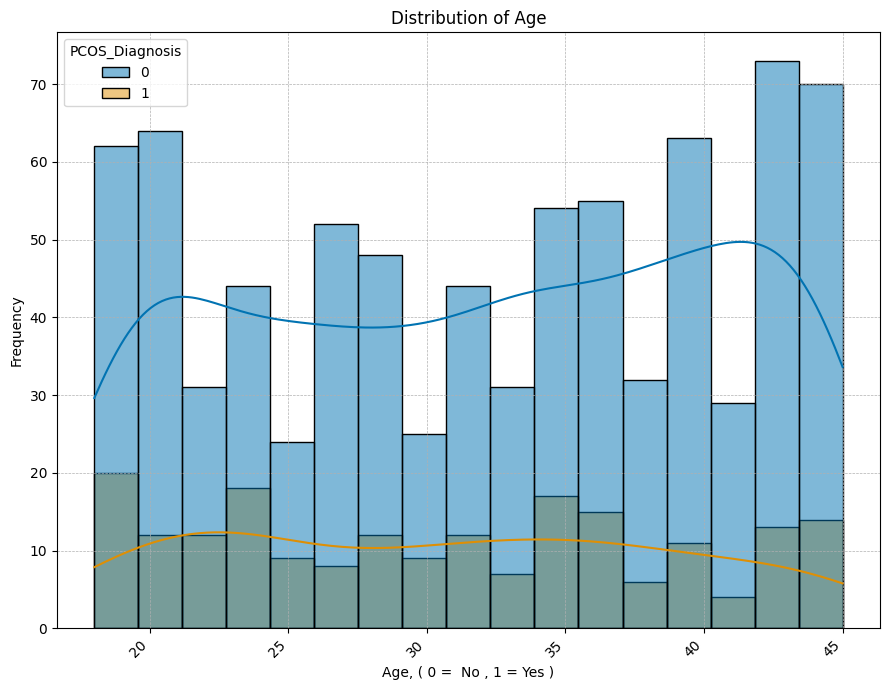

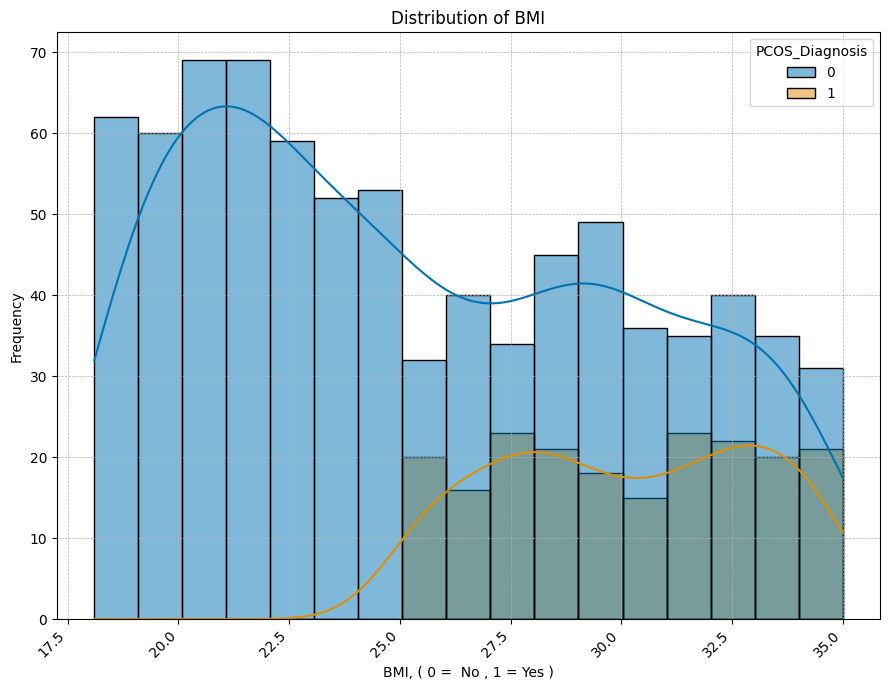

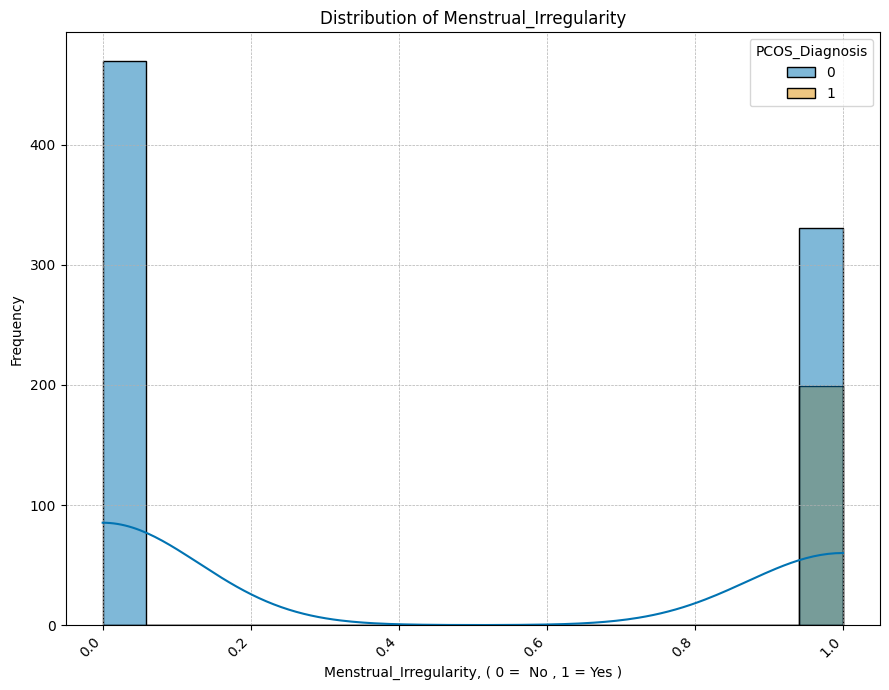

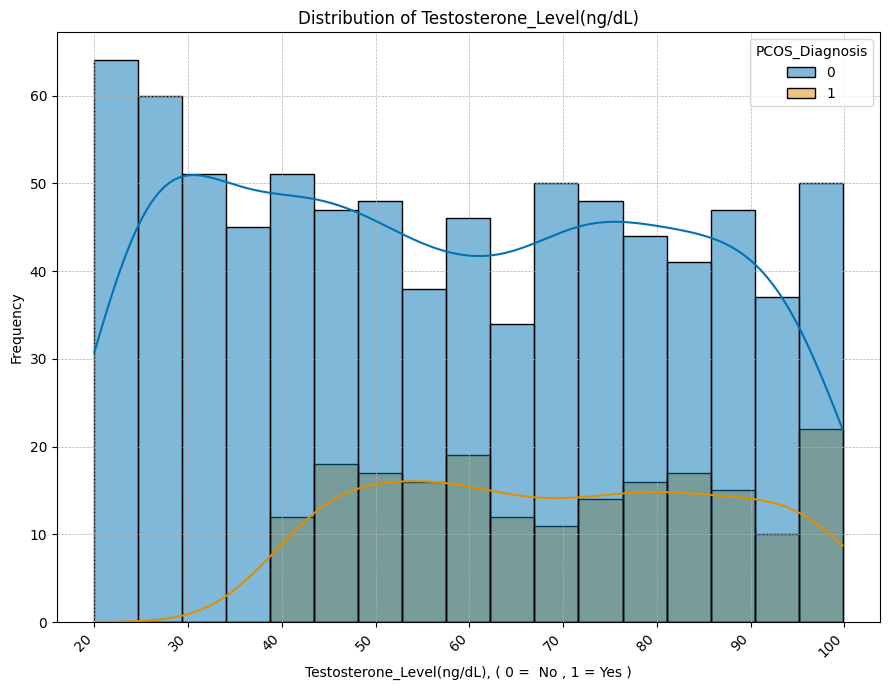

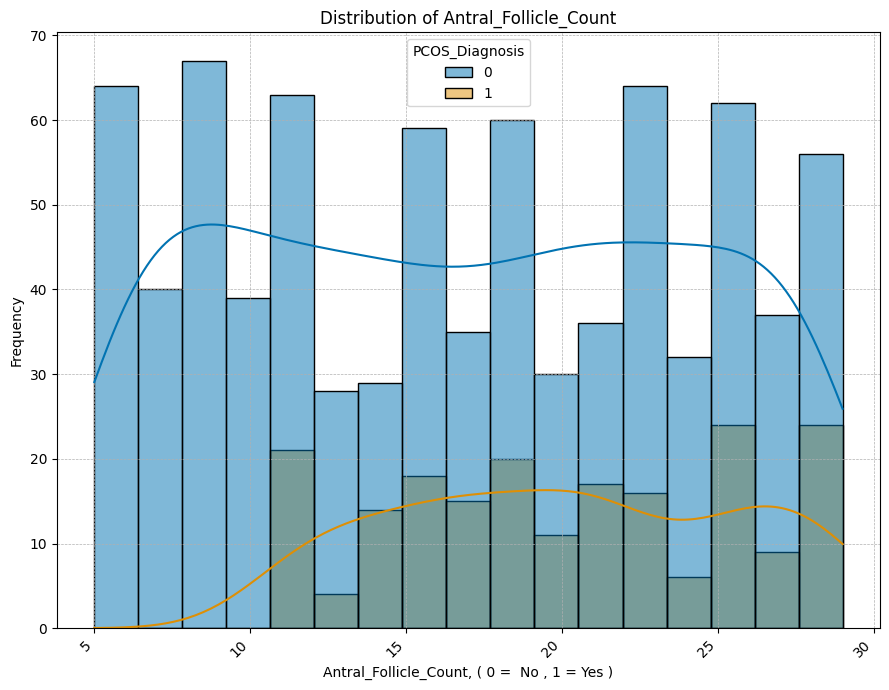

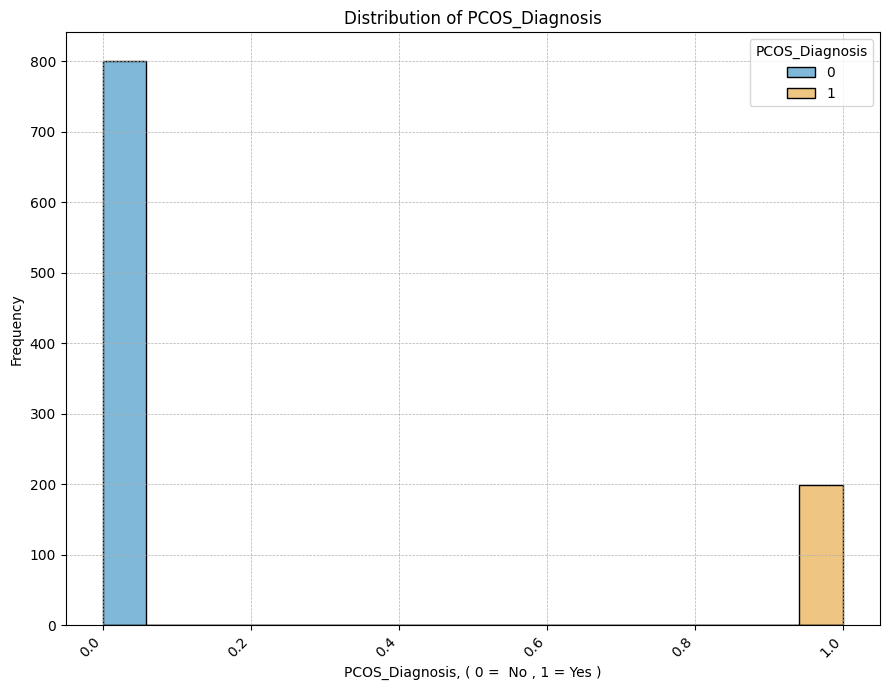

In [10]:
for i in df.columns:
  plt.figure(figsize=(9,7))
  sns.histplot(x=i,kde=True,hue='PCOS_Diagnosis',palette='colorblind',data=df,bins=17)

  plt.xlabel(i+', ( 0 =  No , 1 = Yes )')
  plt.ylabel("Frequency")
  plt.title("Distribution of {}".format(i))
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.show()
  print("\n")

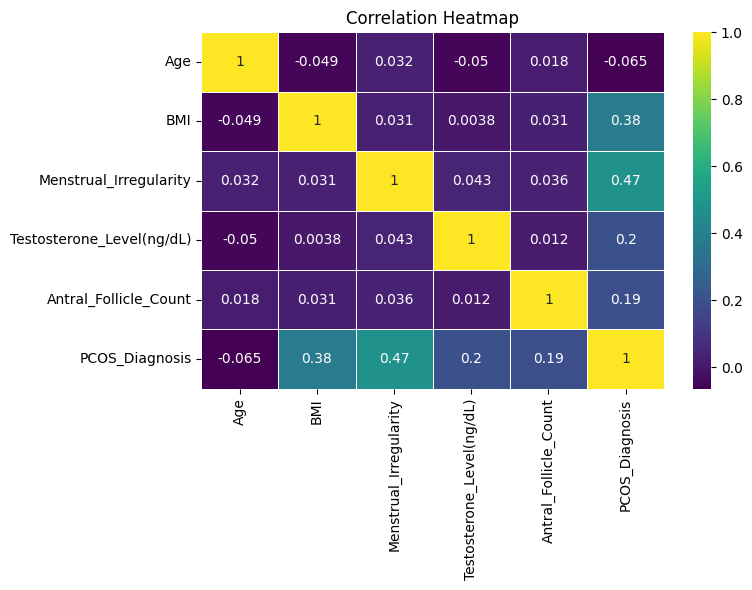

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Visualizing Key Features - BMI, Menstrual Irregularity & Testosterone_Level

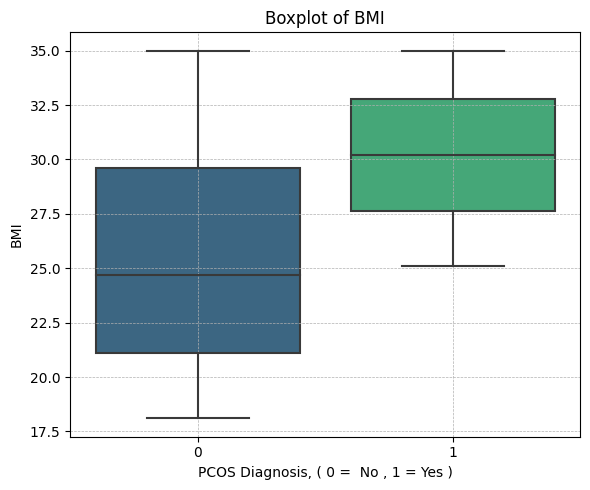

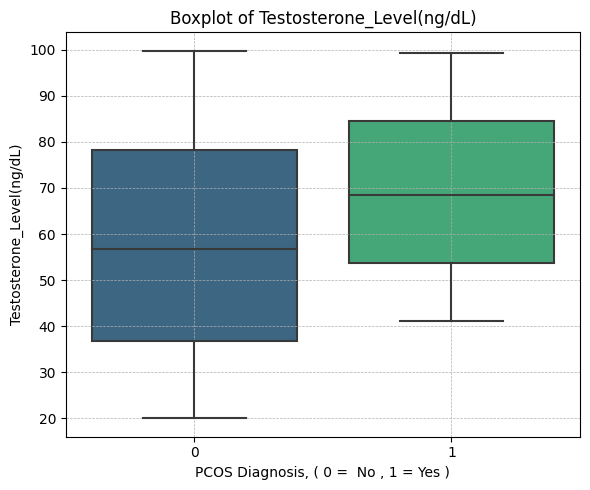

In [12]:
key_features = ['BMI','Testosterone_Level(ng/dL)']
for i in key_features:
  plt.figure(figsize=(6,5))
  sns.boxplot(x='PCOS_Diagnosis',y=i,data=df,palette='viridis')
  plt.xlabel('PCOS Diagnosis, ( 0 =  No , 1 = Yes )')
  plt.ylabel(i)
  plt.title("Boxplot of {}".format(i))
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.tight_layout()
  plt.show()
  print("\n")

Text(0.5, 1.0, 'Countplot of Menstrual Irregularity')

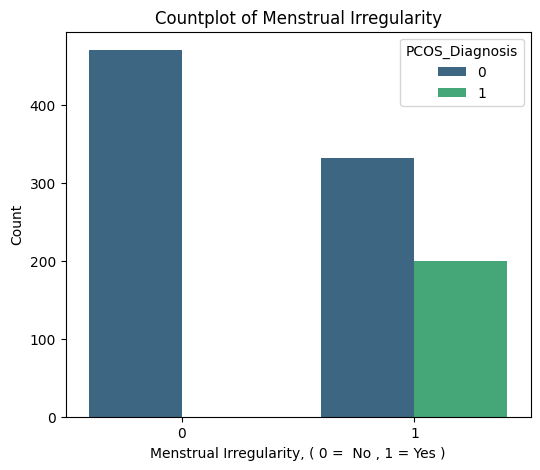

In [13]:
plt.figure(figsize=(6,5))
sns.countplot(x='Menstrual_Irregularity',hue='PCOS_Diagnosis',data=df,palette='viridis')
plt.xlabel('Menstrual Irregularity, ( 0 =  No , 1 = Yes )')
plt.ylabel('Count')
plt.title("Countplot of Menstrual Irregularity")

## 4. Machine Learning & Classification Models Comparison

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report

In [15]:
X = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
y= df['PCOS_Diagnosis']

### Split Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Initialization & Implementation

In [18]:
import time

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine RBF': SVC(random_state=42,kernel='rbf'),
    'Support Vector Machine Linear': SVC(random_state=42,kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [19]:
for name, model in models.items():
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    execution_time = end_time - start_time  # Compute execution time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}'s Accuracy: {accuracy:.4f}")
    print(f"Implementation Time: {execution_time:.4f} seconds\n")
    print(classification_report(y_test, y_pred))
    print("=" * 50)
    print("\n")

Random Forest's Accuracy: 0.9900
Implementation Time: 0.1833 seconds

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



Logistic Regression's Accuracy: 0.8850
Implementation Time: 0.0166 seconds

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       161
           1       0.72      0.67      0.69        39

    accuracy                           0.89       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.88      0.89      0.88       200



Support Vector Machine RBF's Accuracy: 0.9600
Implementation Time: 0.0109 seconds

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       161
    

## 📊 Model Performance Comparison  

Below are the accuracy, classification report results, and implementation times for various machine learning models used for PCOS diagnosis.  

### 1. Random Forest  
- **Accuracy:** 99.00%  
- **Implementation Time:** 0.1783 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.95 (Class 1)  
- **F1-Score:** 0.99 (Class 0), 0.97 (Class 1)  

### 2. Logistic Regression  
- **Accuracy:** 88.50%  
- **Implementation Time:** 0.0059 seconds  
- **Precision:** 0.92 (Class 0), 0.72 (Class 1)  
- **Recall:** 0.94 (Class 0), 0.67 (Class 1)  
- **F1-Score:** 0.93 (Class 0), 0.69 (Class 1)  

### 3. Support Vector Machine (RBF)  
- **Accuracy:** 96.00%  
- **Implementation Time:** 0.0089 seconds  
- **Precision:** 0.98 (Class 0), 0.90 (Class 1)  
- **Recall:** 0.98 (Class 0), 0.90 (Class 1)  
- **F1-Score:** 0.98 (Class 0), 0.90 (Class 1)  

### 4. Support Vector Machine (Linear)  
- **Accuracy:** 89.50%  
- **Implementation Time:** 0.0100 seconds  
- **Precision:** 0.93 (Class 0), 0.74 (Class 1)  
- **Recall:** 0.94 (Class 0), 0.72 (Class 1)  
- **F1-Score:** 0.93 (Class 0), 0.73 (Class 1)  

### 5. K-Nearest Neighbors  
- **Accuracy:** 96.50%  
- **Implementation Time:** 0.0132 seconds  
- **Precision:** 0.98 (Class 0), 0.92 (Class 1)  
- **Recall:** 0.98 (Class 0), 0.90 (Class 1)  
- **F1-Score:** 0.98 (Class 0), 0.91 (Class 1)  

### 6. Decision Tree  
- **Accuracy:** 99.50%  
- **Implementation Time:** 0.0026 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.97 (Class 1)  
- **F1-Score:** 1.00 (Class 0), 0.99 (Class 1)  

### 7. XGBoost  
- **Accuracy:** 99.50%  
- **Implementation Time:** 0.0332 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.97 (Class 1)  
- **F1-Score:** 1.00 (Class 0), 0.99 (Class 1)  

### 8. Naive Bayes  
- **Accuracy:** 69.50%  
- **Implementation Time:** 0.0019 seconds  
- **Precision:** 1.00 (Class 0), 0.39 (Class 1)  
- **Recall:** 0.62 (Class 0), 1.00 (Class 1)  
- **F1-Score:** 0.77 (Class 0), 0.56 (Class 1)  

## 🔍 Observations  
- **Best Performing Models:** Decision Tree, XGBoost, and Random Forest achieved the highest accuracy (~99.50%).  
- **Decision Tree was the fastest among top models**, with an implementation time of 0.0026s.  
- **SVM (RBF) and KNN** performed well, with accuracies above 96%, though KNN took slightly longer to implement (0.0132s).  
- **Naive Bayes** was the fastest model (0.0019s) but had the lowest accuracy (69.50%), indicating poor suitability for this dataset.
- **Logistic Regression and Linear SVM** showed moderate performance but struggled with Class 1 predictions. 
- **Random Forest** had a high accuracy (99%) but took the longest time (0.1783s), making it less efficient than XGBoost and Decision Tree. 

## 5. Plotting Best Models

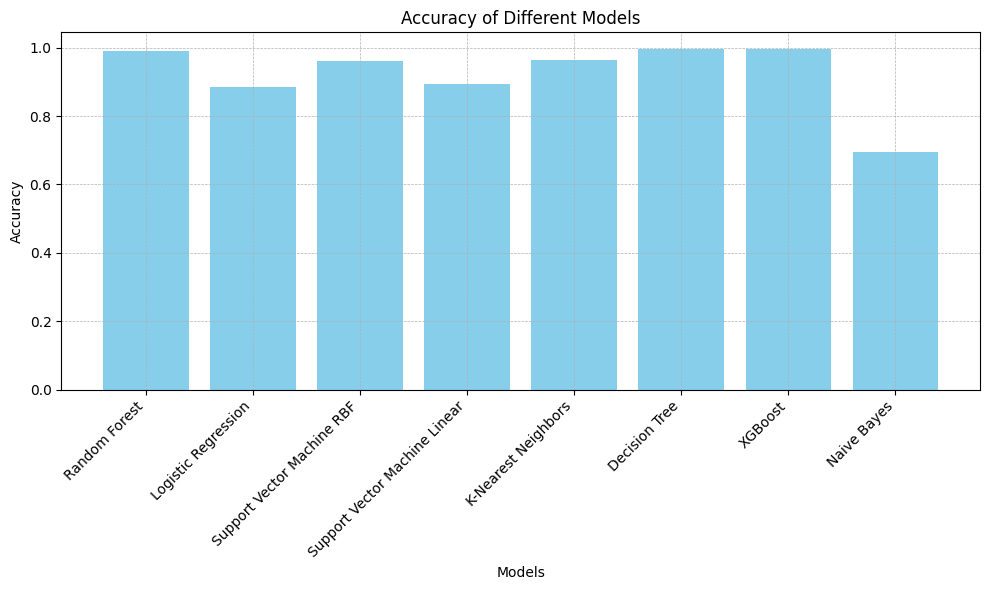

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), [accuracy_score(y_test, model.predict(X_test)) for model in models.values()], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

## 🏆 Conclusion  

After evaluating multiple machine learning models for **PCOS diagnosis**, we can derive the following key takeaways:  

### Best Model Choices:  
1. **Decision Tree & XGBoost** – Achieved the highest accuracy (99.50%) with strong precision, recall, and F1-scores. Decision Tree was the fastest among them (0.0026s).  
2. **Random Forest** – Performed well with 99% accuracy, though it had the longest implementation time (0.1783s).  
3. **SVM (RBF) & KNN** – Reliable models with 96%+ accuracy, but KNN took more time (0.0132s).  

### Performance vs. Speed:  
- **Fastest Model:** Naive Bayes (0.0019s), but it had the lowest accuracy (69.50%).  
- **Balanced Performance:** XGBoost and Decision Tree provide a great trade-off between accuracy and speed.  

### Weak Model Choices:  
- **Naive Bayes** struggled significantly with class imbalance, making it unsuitable for this dataset.  
- **Logistic Regression & Linear SVM** had moderate performance but struggled with Class 1 predictions, making them less reliable.  

### Final Recommendation:  
For high accuracy and efficiency, **Decision Tree or XGBoost** are the best choices. If speed is not a constraint, Random Forest is also an excellent option.  
